# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

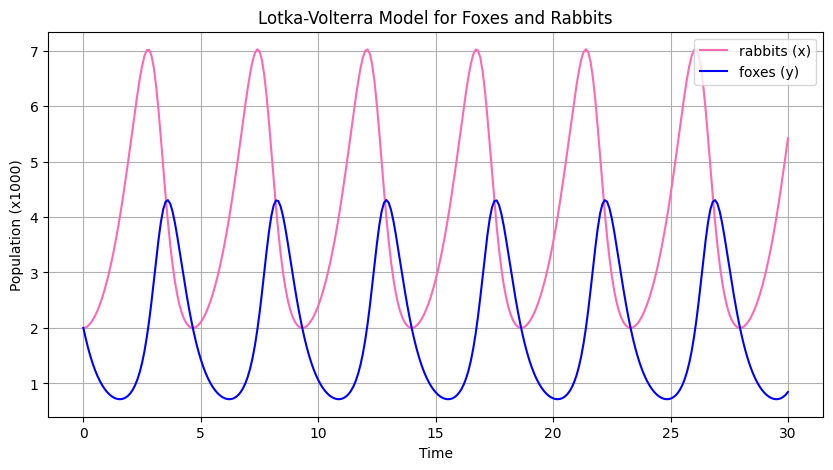

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def dxdt_dydt(u, t):
    x,y = u
    dxdt = alpha*x - beta*x*y
    dydt = gamma*x*y - delta*y
    result = np.array([dxdt, dydt])
    return result

def rungeKutta(h, u, t):
    k1 = h*dxdt_dydt(u, t)
    k2 = h*dxdt_dydt(u+0.5*k1, t+0.5*h)
    k3 = h*dxdt_dydt(u+0.5*k2, t+0.5*h)
    k4 = h*dxdt_dydt(u+k3, t+h)
    u += (k1 + 2*k2 + 2*k3 + k4)/6
    return u

alpha = 1
beta, gamma = 0.5, 0.5
delta = 2
x0, y0 = 2.0, 20

a = 0
b = 30
h = 0.1
t_points = np.arange(a, b+h, h)
x_values = []
y_values = []

initial_xy = np.array([2.0,2.0])
u = initial_xy

for t in t_points:
    x_values.append(u[0])
    y_values.append(u[1])
    u = rungeKutta(h, u, t)

plt.figure(figsize=(10, 5))
plt.plot(t_points, x_values, label = 'rabbits (x)', color = 'hotpink')
plt.plot(t_points, y_values, label = 'foxes (y)', color = 'blue')
plt.xlabel('Time')
plt.ylabel('Population (x1000)')
plt.title('Lotka-Volterra Model for Foxes and Rabbits')
plt.legend()
plt.grid()
plt.show()


### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


In [8]:
# #EXAMPLE 8.6 IN PAGE 359 PDF
# import numpy as np
# import matplotlib.pyplot as plt

# # Function that defines the nonlinear pendulum equations
# def nonlinear_pendulum(t, u, l, g):
#     theta, omega = u
#     dtheta_dt = omega
#     domega_dt = -(g / l) * np.sin(theta)
#     return np.array([dtheta_dt, domega_dt])

# # Function for the fourth-order Runge-Kutta method
# def runge_kutta(h, t, u, l, g):
#     k1 = h * nonlinear_pendulum(t, u, l, g)
#     k2 = h * nonlinear_pendulum(t + 0.5 * h, u + 0.5 * k1, l, g)
#     k3 = h * nonlinear_pendulum(t + 0.5 * h, u + 0.5 * k2, l, g)
#     k4 = h * nonlinear_pendulum(t + h, u + k3, l, g)
#     return u + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# # Parameters
# l = 0.1  # Arm length in meters
# g = 9.8  # Acceleration due to gravity in m/s^2

# # Initial conditions
# u0 = np.array([179 * np.pi / 180, 0])  # Initial angle in radians, released from rest

# # Time settings
# t0 = 0
# tf = 10  # Adjust as needed for several periods
# h = 0.01  # Time step size

# # Lists to store results
# t_values = np.arange(t0, tf + h, h)
# theta_values = []

# # Numerical solution using Runge-Kutta
# u = u0
# for t in t_values:
#     theta_values.append(u[0])
#     u = runge_kutta(h, t, u, l, g)

# # Convert angles back to degrees for plotting
# theta_values_degrees = np.degrees(theta_values)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(t_values, theta_values_degrees)
# plt.title('Nonlinear Pendulum Motion')
# plt.xlabel('Time (s)')
# plt.ylabel('Angle (degrees)')
# plt.grid(True)
# plt.show()
